# Стратегия взаимодействия с клиентами сети фитнес-центров на основе аналитических данных

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Первичное-знакомство-с-данными" data-toc-modified-id="Первичное-знакомство-с-данными-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Первичное знакомство с данными</a></span></li><li><span><a href="#Средние-значения-и-стандартные-отклонения" data-toc-modified-id="Средние-значения-и-стандартные-отклонения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Средние значения и стандартные отклонения</a></span></li><li><span><a href="#Сопоставление-распределений-признаков-по-ушедшим-и-оставшимся" data-toc-modified-id="Сопоставление-распределений-признаков-по-ушедшим-и-оставшимся-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сопоставление распределений признаков по ушедшим и оставшимся</a></span></li><li><span><a href="#Корреляционная-матрица-и-тепловая-карта" data-toc-modified-id="Корреляционная-матрица-и-тепловая-карта-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Корреляционная матрица и тепловая карта</a></span></li><li><span><a href="#Удаление-вредных-для-модели-дублирующих-и-нейтральных-данных" data-toc-modified-id="Удаление-вредных-для-модели-дублирующих-и-нейтральных-данных-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Удаление вредных для модели дублирующих и нейтральных данных</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Создание-моделей-и-выбор-из-них-наиболее-адекватной" data-toc-modified-id="Создание-моделей-и-выбор-из-них-наиболее-адекватной-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание моделей и выбор из них наиболее адекватной</a></span></li><li><span><a href="#Оценка-роли-параметров" data-toc-modified-id="Оценка-роли-параметров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Оценка роли параметров</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Матрица-расстояний-и-дендрограмма" data-toc-modified-id="Матрица-расстояний-и-дендрограмма-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Матрица расстояний и дендрограмма</a></span></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Кластеризация</a></span></li></ul></li><li><span><a href="#Выводы-и-базовые-рекомендации" data-toc-modified-id="Выводы-и-базовые-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации</a></span></li></ul></div>

## Постановка задачи

Провести анализ клиентских анкет и подготовить план действий по удержанию клиентов:
* сделать проноз вероятности оттока для каждого клиента,
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства,
* проанализировать основные признаки, наиболее сильно влияющие на отток,
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import itertools

from statistics import mean

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

**Описание данных (пояснения к названиям столбцов)**

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

'Churn' — факт оттока в текущем месяце.

## Исследовательский анализ данных (EDA)

### Первичное знакомство с данными

In [3]:
print ('Размер массива данных:', data.shape)
display(data.head())

Размер массива данных: (4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Таким образом:
- 14 колонок данных соответствуют их описанию,
- стилистика названий колонок в целом соответствует канонанам за исключением начала большинства из них с заглавной буквы,
- мартица длиной 4000 строк не содержит пропусков,
- типы данных соответствуют ожидаемым,
- категориальные переменные имеют числовой характер и не требуют преобразований.

In [5]:
# Приведение названий к нижнему регстру
data.columns = data.columns.str.lower()

### Средние значения и стандартные отклонения

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Оценки на основе общих данных**
- Все показатели производят впечатление адекватных своиму содержанию, прпавдоподобны.
- Подозрений на выбросы и аномальные значения на данном этапе нет.
- Среднее значение оттока в текущем месяце (26,5%) выглядит не очень оптимистично, но показатель можно снизить.

Рассмотрим средние значения по оставшимся (churn=0) и ушедшим (churn=1)

In [7]:
data.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Оценки средних значений на основе разделенных данных**

Между ушедшими и сотавшимися нет значимых различий:
- по половому признаку,
- по наличию номера телефона.

По всем остальным признакам различия имеются, в большинстве случаев существенные.

Таким образом, пока только пол и телефон выглядят признаками, которые не стоит загружать в модель.

### Сопоставление распределений признаков по ушедшим и оставшимся

Рассмотрим распределения только по небинарным признакам.

In [8]:
list_of_signs = [
    'contract_period',
    'age',
    'avg_additional_charges_total',
    'month_to_end_contract',
    'lifetime',
    'avg_class_frequency_total',
    'avg_class_frequency_current_month'
    ]

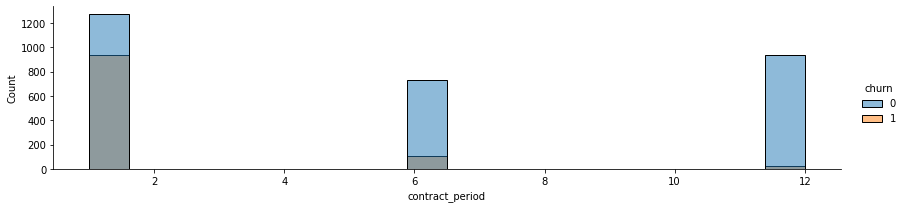

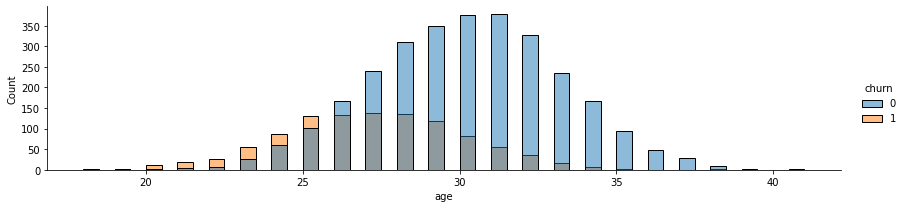

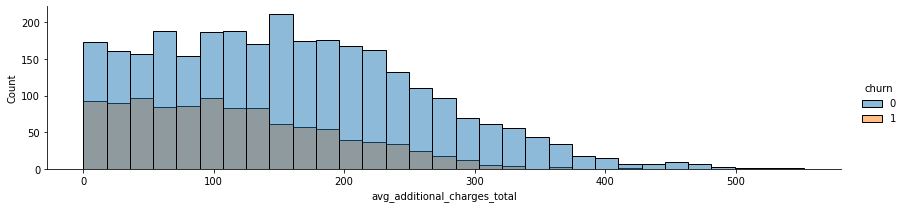

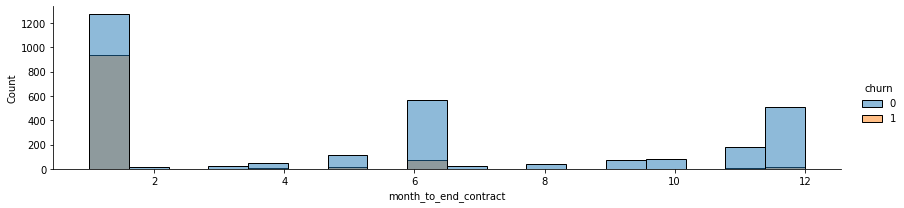

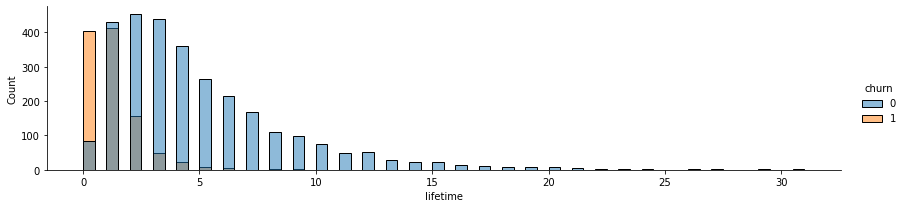

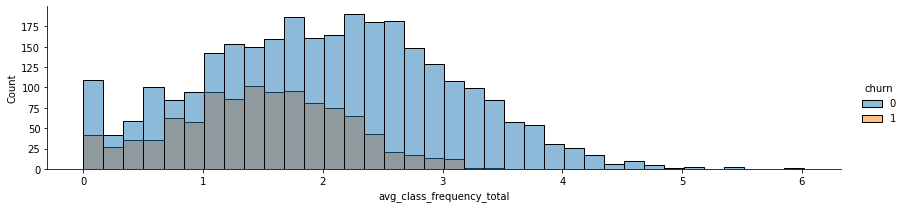

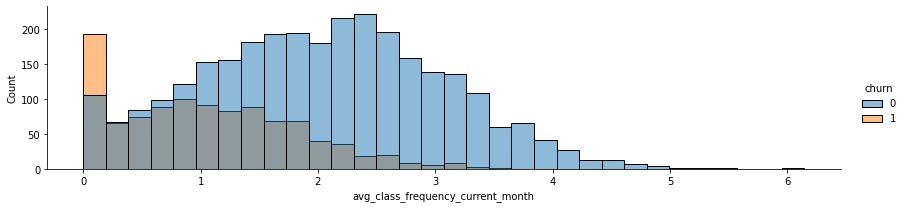

In [9]:
for item in list_of_signs:
    fig = sns.displot(x=item, data=data, hue='churn', height=3, aspect = 4)

Среди особенностей (различий) в распределениях выделяется следующее.
1. Ушедшие, в отличие от оставшихся, как правило, не имеют среднесрочных и долгосрочных договоров.
2. Возрастное распределение ушидших сдвинути влево (в сторону более моложого возраста) по сравнению с оставшимися. При этом распределение ушедших близко к симметричному, а распределение оставшихся имеет заметную скошенность вправо.
3. Распределение потребления дополнительных услуг примерно одинаково у ушедших и оставшихся, однако средний уровень этого потребления у ушедших значительно ниже.
4. Сроки до окончания текущего контракта у ушедших, как правило, являются минимальными (1 месяц), что логично, так как разрыв долгосрочного контракта является исключением из правила. В целом же данный показатель, хотя и не одинаков у ушедших и оставшихся, но является еще одним кандидатом на исключение из модели (он вторичен по отношению к параметру длительности договора).
5. "Время жизни" ушедших имеет пик на 1-2 месяцах и почти сходит на нет к 5 месяцам, в то время как у остающихся среднний срок взаимодействия с сетью финтес-центров составляет 3 месяца и остается на существенном уровне до 1,5 лет.
6. Средняя частота посещений в неделю за предыдущий месяц у обеих категорий имеет одинаковый характер распределения, но у ушедших средний уровенть существенно ниже и распределение сжато к существенно более коротким срока по сравнению с оставшимися.
7. Средняя частота посещений в неделю за предыдущий месяц - еще сильнее характеризует различия между ушедшими и оставшимися. Вместе с тем массовое отсутствие посещений за неделю у ушедших - это, скорее всего, признак архивного характера базы данных (база продолжает фиксировать отсутствие посещений со ситороны ушедших и "накапливат" их). Вместе с тем - это и явный "сигнал" об вероятном уходе.

Все эти наблюдения свидетельствуют о том, что ушедшие уходят вскоре после прихода в центр. Если же клиент задержался, то, вероятнее всего, он останется надолго.

### Корреляционная матрица и тепловая карта

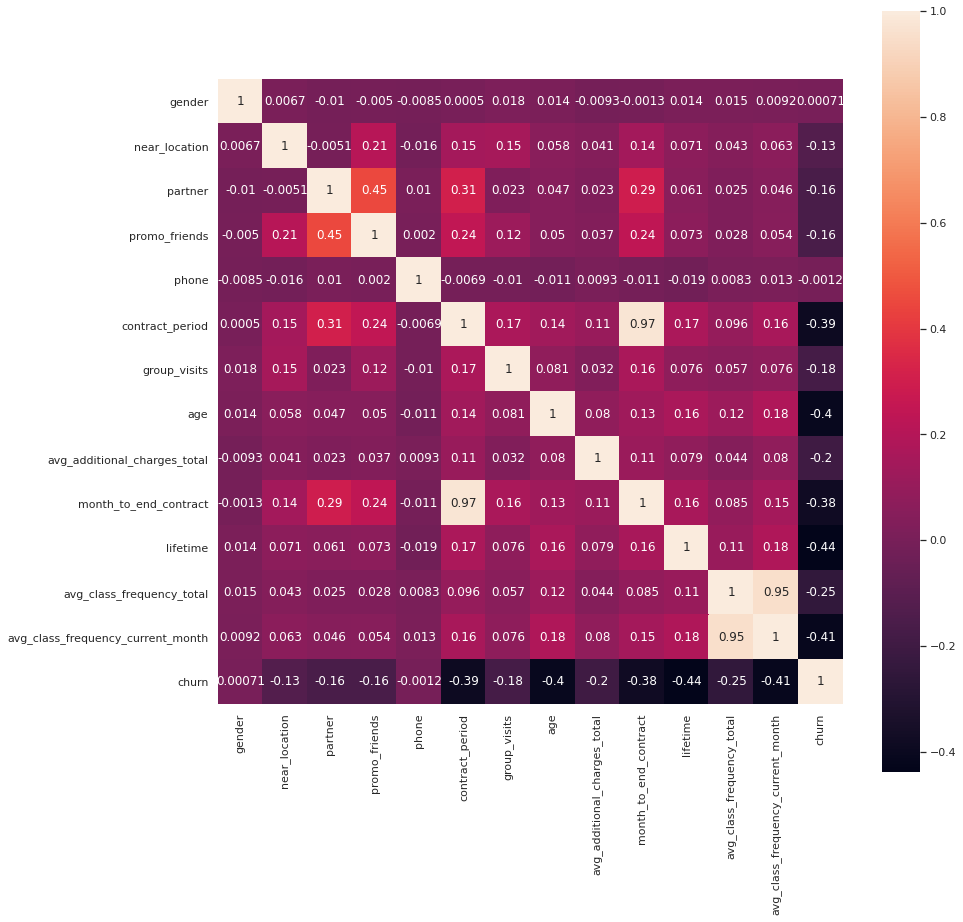

In [10]:
cm = data.corr()

sns.set(rc = {'figure.figsize':(14,14)})
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, square=True)
# ax.set_ylim(7, 0)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

**Констатации**
1. Сильные корреляции между контрактным периодам и сроком до окончания контракта, а также между частотой посещения в текущем месяце и частотой за весь период, по сути, естественны (по их содержанию) и интересны только в том плане, что из модели один признак из каждой пары можно исключить. Оставить показатель текущего месяца логичнее, так как он не содержит в себе накопленной (и потому сглаженной) ретроспективы. Также остается срок контракта: в отличие от остаточного срока он более показателен в части поведения клиентов и их решений.
2. Корреляции между промо-кодами и партнерством также велико, но также естественно. Однако уровень корреляции не дает оснований для исключения одного из этих признаков.
2. Наиболее значимы для оттока клиентов корреляции с длительностью жизненного цикла, возрастом, длительностью договора (остаточным сроком до конца договора). Скорее всего, они станут определяющими факторами в модели (с наибольшими весами).

### Удаление вредных для модели дублирующих и нейтральных данных

In [11]:
drop_list = [
    'gender',
    'phone',
    'avg_class_frequency_total',
    'month_to_end_contract'
]

In [12]:
for excess_column in drop_list:
    data.drop(excess_column, axis=1, inplace=True)

print(f'Новый размер таблицы с данными: {data.shape}')

Новый размер таблицы с данными: (4000, 10)


## Построение модели прогнозирования оттока клиентов

### Создание моделей и выбор из них наиболее адекватной

Создаем модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце (поле churn).

In [13]:
# Разделение данных на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['churn'])
y = data['churn']

In [14]:
# Разделение данных на обучающую и валидационную выборки
# random_state=0 - для повторных воспроизведений результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

В качестве конкурирующих моделей бинарной классификации рассмотрим логистическую регрессию и рандомный лес, а также - дополлнительно - модель градиентного бустинга.

In [15]:
models = [
    LogisticRegression(solver='liblinear', random_state = 0),
    RandomForestClassifier(n_estimators = 100, random_state = 0),
    GradientBoostingClassifier(n_estimators = 100, random_state = 0),      
]

In [16]:
for model in models:
    # Обучение модели
    model.fit(X_train, y_train)

    # Прогноз бинарного результата
    predictions = model.predict(X_test)

    # Расчет и печать метрик качества
    acc = accuracy_score(y_test, predictions)
    p = precision_score(y_test, predictions)
    r = recall_score (y_test, predictions)
    
    print (f'Метрики для модели {model}:')
    print('\tAccuracy: {:.3f}'.format(acc))
    print('\tPrecision: {:.3f}'.format(p))
    print('\tRecall: {:.3f}'.format(r))
    print('\tСредний показатель по всем метрикам: {:.3f}'.format(mean([acc, p , r])), '\n')

Метрики для модели LogisticRegression(random_state=0, solver='liblinear'):
	Accuracy: 0.895
	Precision: 0.785
	Recall: 0.793
	Средний показатель по всем метрикам: 0.824 

Метрики для модели RandomForestClassifier(random_state=0):
	Accuracy: 0.889
	Precision: 0.791
	Recall: 0.747
	Средний показатель по всем метрикам: 0.809 

Метрики для модели GradientBoostingClassifier(random_state=0):
	Accuracy: 0.900
	Precision: 0.811
	Recall: 0.778
	Средний показатель по всем метрикам: 0.829 



**Вывод**

Все модели показали примерно одинаковый результат, однако лучшим стал **градиентный бустинг**, в том числе благодаря более высокой доле правильных ответов (accuracy) и наивысшей точности (precision). Он принимается в качестве финальной модели.

### Оценка роли параметров

In [17]:
final_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
final_model.fit(X_train, y_train)
# predictions = final_model.predict(X_test)

# Создание таблицы коэффициентов модели
coeffs_data = {'feature': X.columns, 'coeff': final_model.feature_importances_}
features = pd.DataFrame(coeffs_data)
print(features.sort_values(by='coeff', ascending=False))

                             feature     coeff
7                           lifetime  0.520815
8  avg_class_frequency_current_month  0.166364
3                    contract_period  0.151219
5                                age  0.109570
6       avg_additional_charges_total  0.039724
4                       group_visits  0.007149
2                      promo_friends  0.003535
0                      near_location  0.001406
1                            partner  0.000218


**Констатации**
1. Наиболее значимы для прогнозной модели:
* время взаимодействия с клиентом, 
* а также (в меньшей степени) частота посещения в прошедшем месяце,
* возраст и 
* объем дополнительных услуг.
2. Оказывают наименьшее влияние на результат: 
* близось к центру,
* работа в партнерских организациях,
* а также приход по промо-рекомендации и 
* приход в составе групп.

## Кластеризация клиентов

### Стандартизация данных

### Матрица расстояний и дендрограмма

Стандарнтизируем данные.

In [18]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Формируем матрицу расстояний между признаками.

In [19]:
linked = linkage(X_sc, method = 'ward')
print(f'Размер матрицы расстояний:{linked.shape}')

Размер матрицы расстояний:(3999, 4)


Формируем дендрограмму - агомеративную (ветвящуюся кластеризованную) визуализацию расстояний между признаками. 

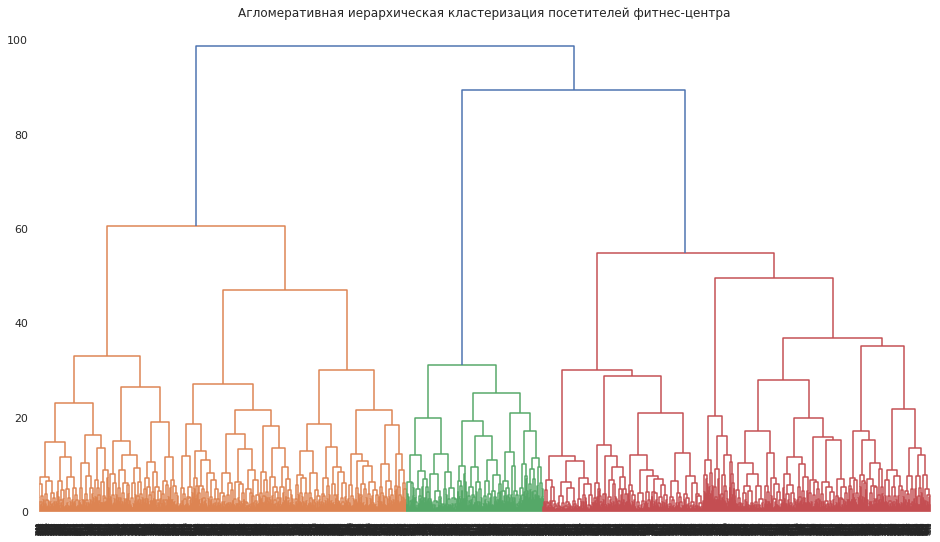

In [20]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation='top')
plt.title('Агломеративная иерархическая кластеризация посетителей фитнес-центра')
plt.show()

**Результаты**
* Дендрограмма сформирована для 4000 клиентов.
* Основные отличия между клиентами (более 40% высоты диаграммы сверху) приходятся на 4 кластеризованные группы.
* Следующий уровень различий (несколько более 50% высоты диаграммы сверху, т.е. с разницей около 10% высоты) приводит к дроблению на 7 кластеров (групп клиентов).
* Учитывя высокий уровень различий между 4 группами и небольшую степень добавленных различий в случае 7 групп, с точки зрения ведения бизнеса и коммуникаций с клиентами целесообразно остановиться на 4 кластерах.

### Кластеризация

Определив с помощью дендрограммы число кластеров, для проведения кластеризации используем алгоритм K-Means.

In [21]:
# На вход функции подается:
# число кластеров: n_clusters=4
# параметра random_state=0 для повторных воспроизведений результата
km = KMeans(n_clusters=4, random_state=0) # фиксируем значение random_state=0 для воспроизводимости результата
labels = km.fit_predict(X_sc)

Дополним признаком кластера базовую таблицу с данными и проанализируем средние результаты по кластеру.

In [22]:
data['cluster'] = labels
cluster_count = data.groupby('cluster').agg({'cluster':'count'}).rename(columns={'cluster':'count'})
cluster_count_sum = cluster_count['count'].sum()
cluster_count['share'] = round(cluster_count['count'] / cluster_count_sum * 100, 2)
cluster_count

,count,share
cluster,,
0,1059,26.48
1,1232,30.80
2,1098,27.45
3,611,15.28


Кластер 1 - наиболее многочисленный (почти 31%). Следующие по численности - кластеры 0 и 2 (примерно 26-27%). Наименее многочисленный кластер 3 (15%). Данная структура (три крупных кластера и один кластер "второго эшелона") несколько отличается от более однородной предварительной графической иллюстрации дендрограммы (два крупных кластера и один небольшой кластер). Разница обусловлена разными алгоритмами, при этом дендрограмма является предварительным этапом перед применением алгоритма К средних.

Проанализируем средние результаты по кластеру.

<div class="alert alert-info"> <b>Комментарий студента: </b>Результаты выше уточнены при другой модели и сокращенном количестве параметров.</div>

In [23]:
cluster_data = data.groupby('cluster').agg('mean')
display(cluster_data)

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,
0,0.996223,0.406043,0.010387,6.613787,0.532578,30.659112,173.155562,5.659112,2.314427,0.013220
1,1.000000,0.198864,0.064123,1.900974,0.298701,27.768669,123.167399,1.950487,1.255645,0.542208
2,0.996357,0.886157,1.000000,6.874317,0.524590,29.630237,153.757348,4.256831,1.908120,0.121129
3,0.000000,0.489362,0.075286,2.996727,0.230769,28.680851,137.210096,2.993453,1.596004,0.402619


**Особенности кластеров**
1. Близко расположены к фитнес-центрам клиенты 0, 1 и 2 кластера, клиенты кластера 3 живут далеко.
2. Преимущественно "партнерскими" является кластеры 2, кластеры 0 и 3 в меньшей степени, а кластер 1 почти не связан с такими обстоятельствами.
3. Пришли по промо-приглашению все клиенты кластер 2, остальные клиенты (кластер 0, 2, 3) пришли в основном "самотеком".
4. Период контракта наибольший у кластеров 0 и 2, у остальных - в разы меньше.
5. Роль групповых визитов наибольшая у кластеров 0 и 2 (более 50%), у других кластеров ниже.
6. По среднему возрастному признаку кластеры не имеют существенных различий, хотя последовательность кластеров 1, 3, 2, 0 выстраивает их от "молодых" к чуть более "старшим".
7. Средний уровень дополнительных расходов клиентов варьруется незначительно, но кластер 0 несколько "возвышается" над остальными.
8. Кластер 0 в лидерах и по длительности "жизни" в фитнес-центре (5,7 месяца). Впрочем более короткую длительность в других кластерах (4,3 мес. у кластера 2, 3,0 - у 3 и 2,0 - у 1) нельзя считать принципиально отличающейся, хотя разница и существенна.
9. Средняя посещаемость в месяц у всех кластеров невелика (от 1,3 до 2,3). Чаще других ходят в спортзал клиенты кластера 0, в отстающих кластер 1.

Таким образом, клиенты кластера 0 и 2 обладают наилучшими характеристиками для сети фитнес-центров благодаря длительности контрактов и повышенному объему дополнительных услуг. При этом надо иметь в виду, что их главное отличие в том, что кластер 2 привлечен друзьями по промо-акциям, а кластер 0 пришел "своим ходом".

In [24]:
display(data.groupby('cluster').agg('median'))

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,
0,1,0,0,6,1,31,166.568204,4,2.361833,0
1,1,0,0,1,0,28,110.154401,1,1.179751,1
2,1,1,1,6,1,30,149.001606,3,1.900987,0
3,0,0,0,1,0,29,124.554844,2,1.504597,0


На медианных значениях те же различия и сходства выражены еще более четко.

Создадим графики для отображения попарных сочетаний признаков с разметкой по кластерам (графики плотности распределения).

In [25]:
# Функция отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name, size):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], 
        hue=df[cluster_name], palette='Paired', s = size
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


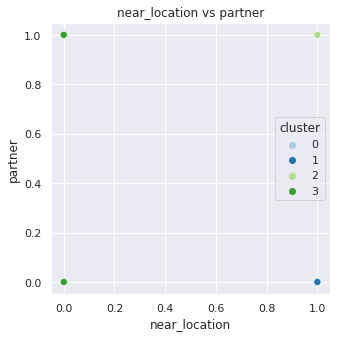

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


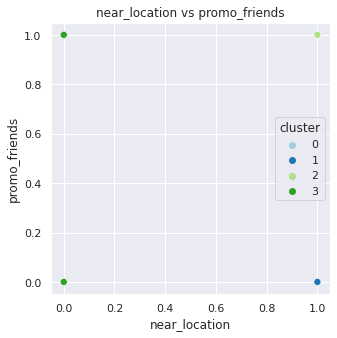

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


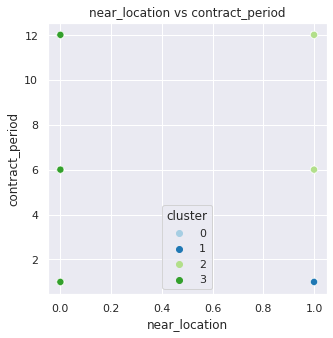

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


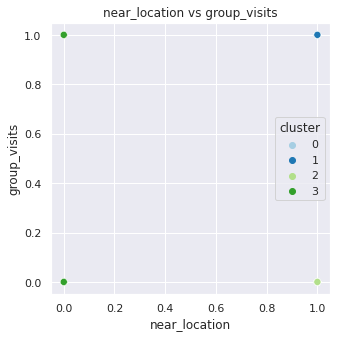

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


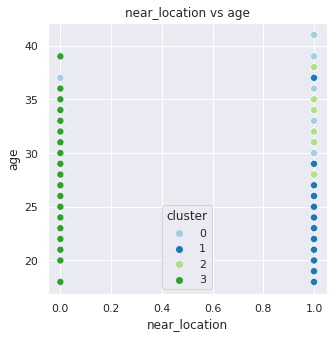

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


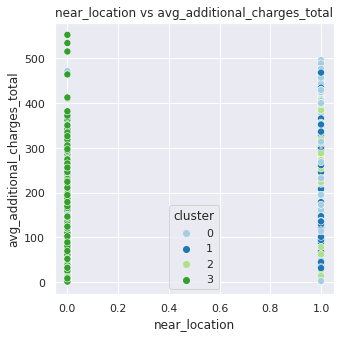

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


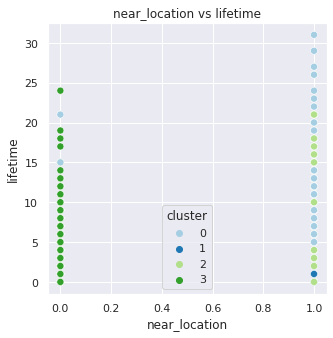

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


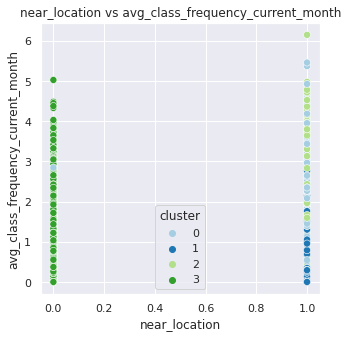

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


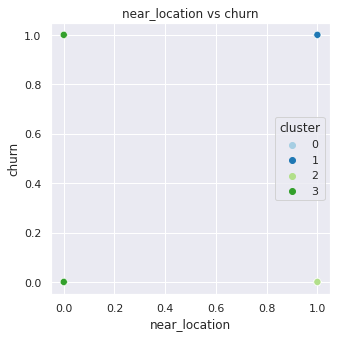

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


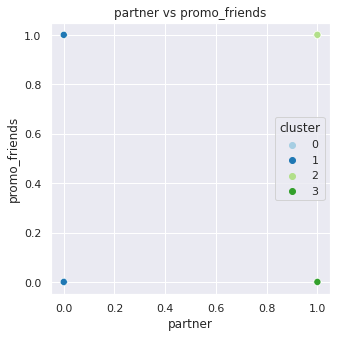

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


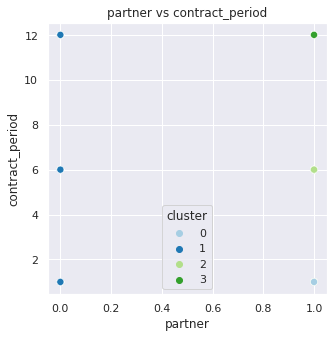

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


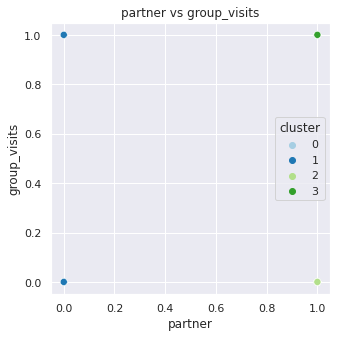

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


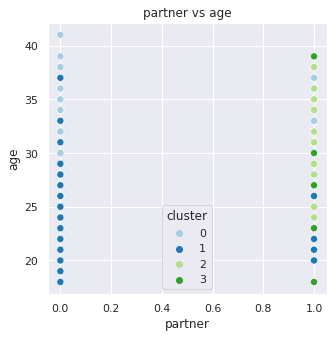

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


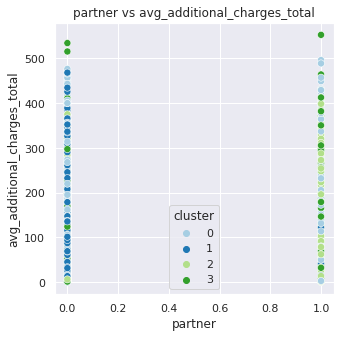

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


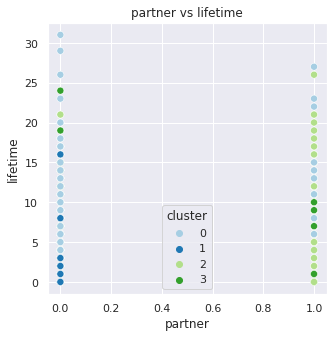

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


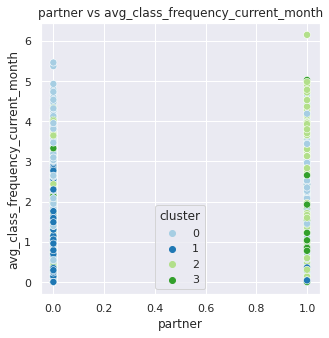

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


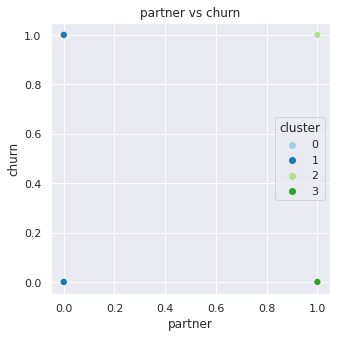

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


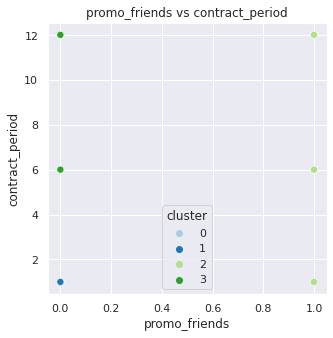

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


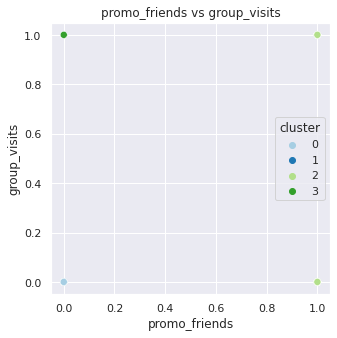

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


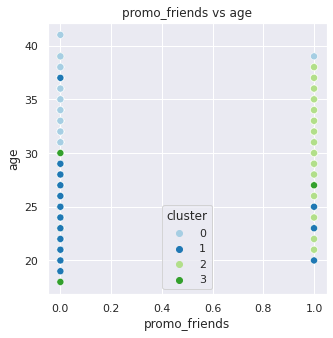

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


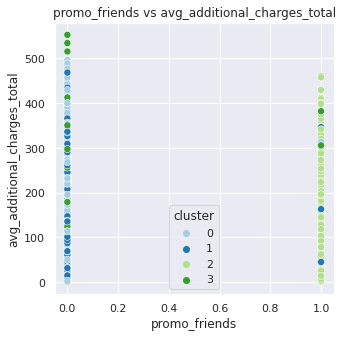

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


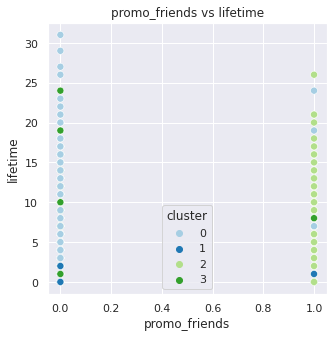

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


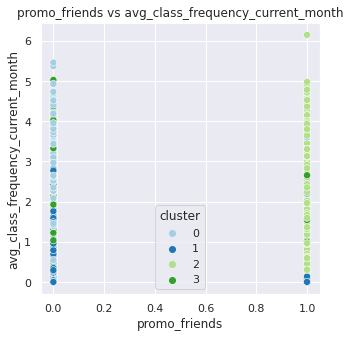

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


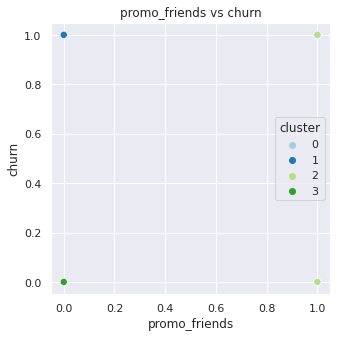

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


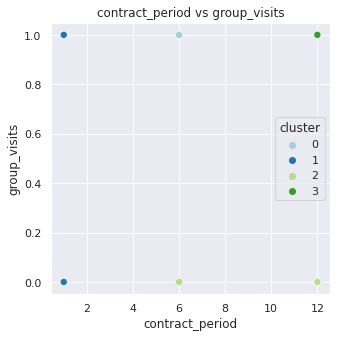

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


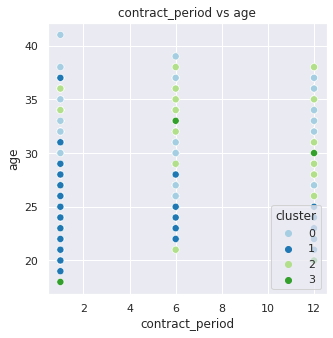

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


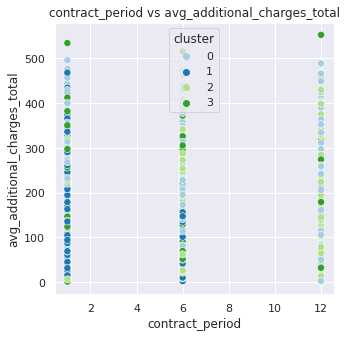

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


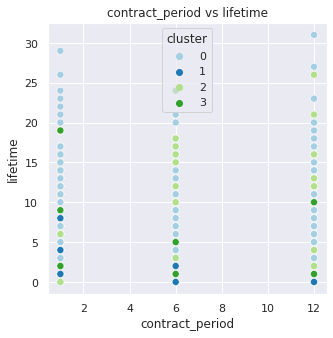

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


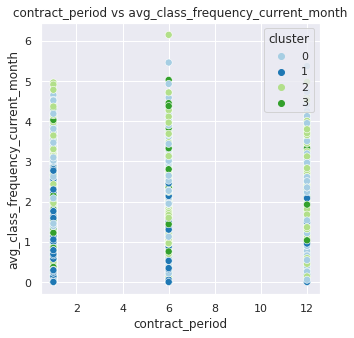

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


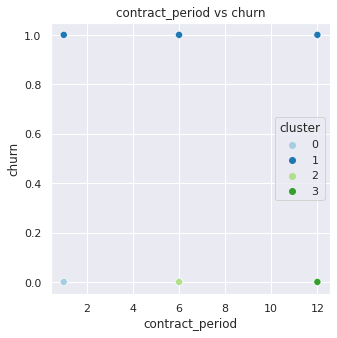

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


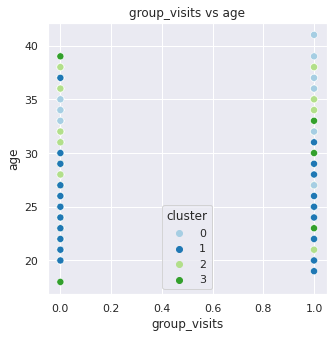

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


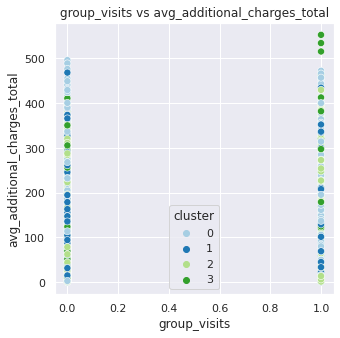

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


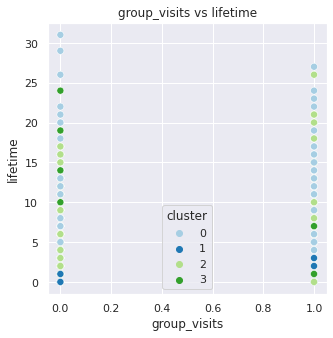

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


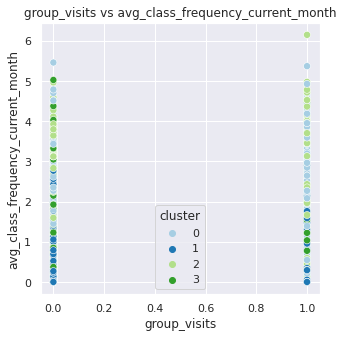

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


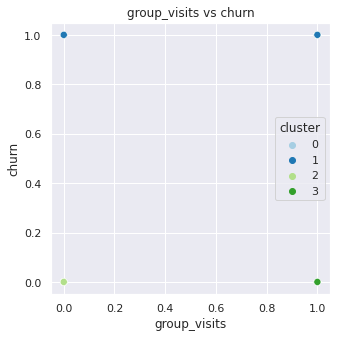

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


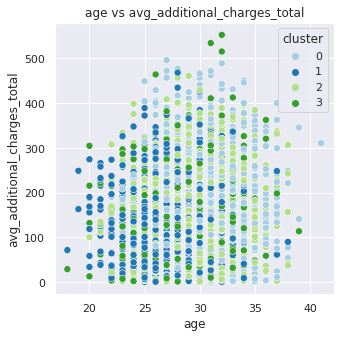

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


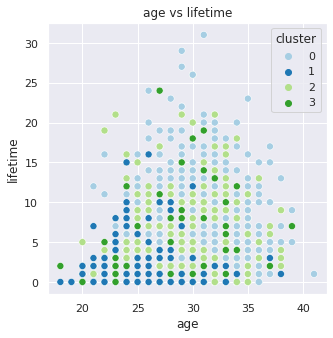

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


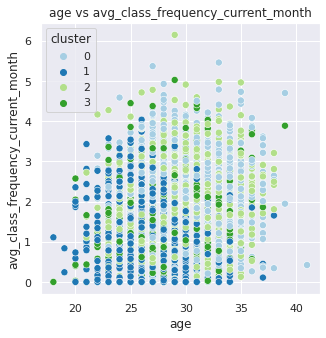

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


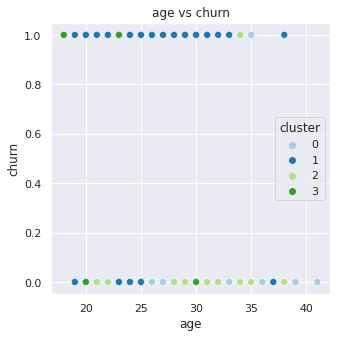

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


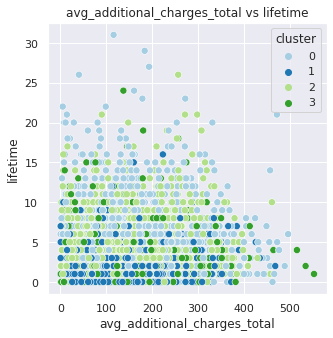

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


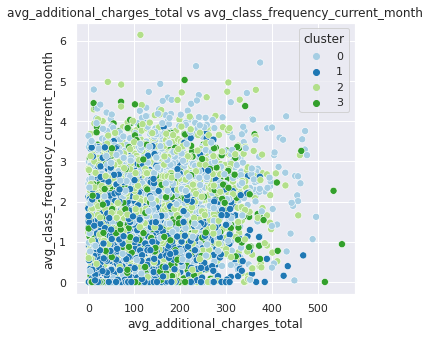

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


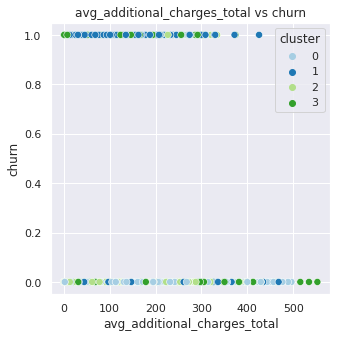

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


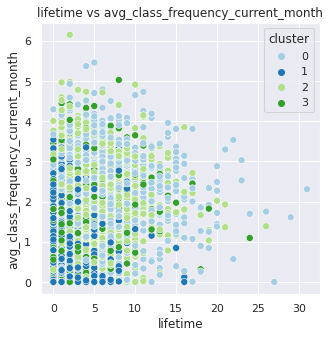

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


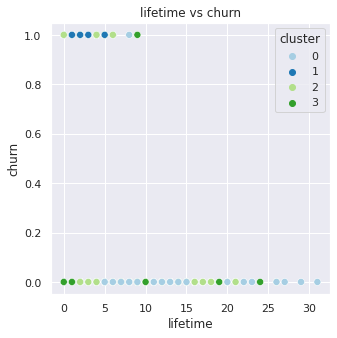

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


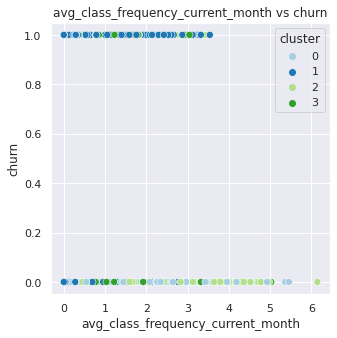

In [26]:
col_pairs = list(itertools.combinations(data.drop('cluster', axis=1).columns, 2))

for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster', 50)

**Дополнительные констатации на основе диаграмм**
* Разбивка по кластерам хорошо отображается графически, кластеры-"монополисты" в своих признаках четко занимают подавляющее большинство "своих" позиций.
* Минимальная длительность контрактного периода увеличивается с возрастом клиента (годовые договоры не заключают клиенты моложе 25 лет).
* Наивысшая частота ежемесячных посещений у 6-месячных "контрактиков" (только у них она может составлять 5-6 и более раз в месяц; клиенты, заключившие договоры на 1 и 2 месяцев, не посещают залы чаще 5 раз в месяц).
* Только посетители групповых занятий могут тратить 500-600 ед. на дополнительные услуги ("индивидуалы" не превышают 500 ед.).
* Имеется прямая корреляция между возрастом и величиной дополнительных оплат. Однако она имеет широкую плосу рассеивания.
* Имеется прямая корреляция между возрастом и продолжительностью взаимодействия клиентов с сетью.
* Имеется прямая корреляция между возрастом и частотой ещемесячного посещения центров. Однако она имеет широкую плосу рассеивания.
* Кто чаще посещает фитнес-центры, тот, по статистике, тратит больше средств на дополнительные услуги. Однако дисперсия этой зависимости очень широкая.

Наконец, прооиллюстрируем взаимное расположение пар паризнаков по средним показателям каждого кластера в целом.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


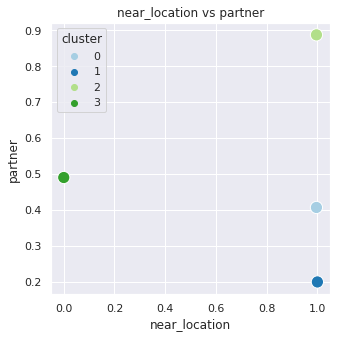

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


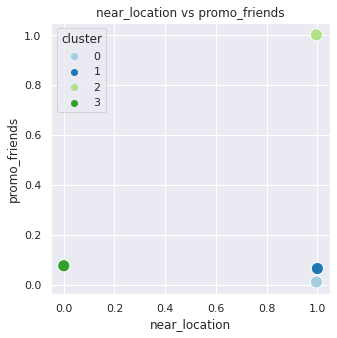

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


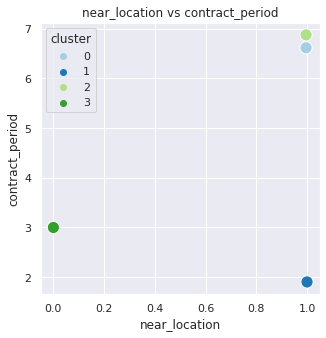

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


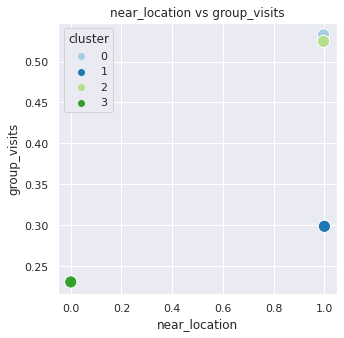

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


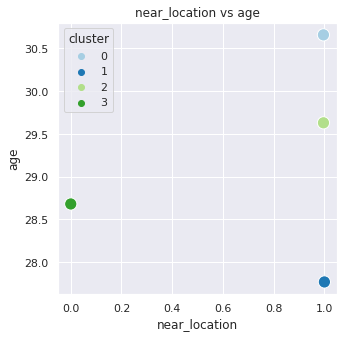

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


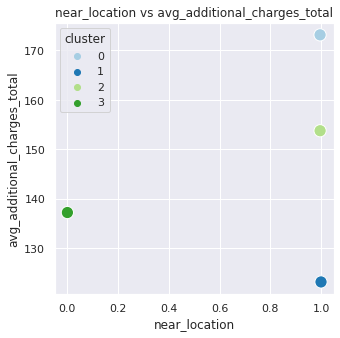

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


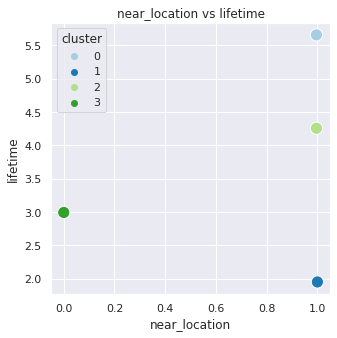

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


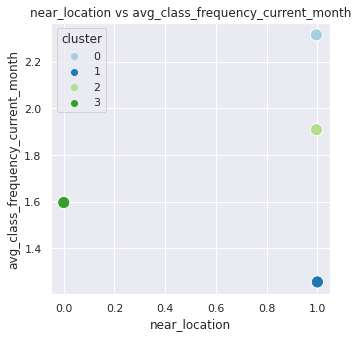

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


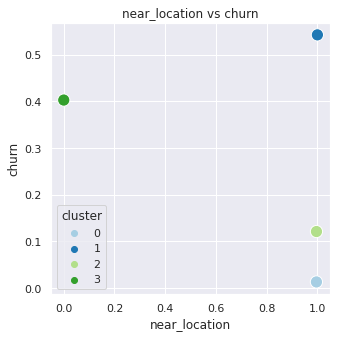

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


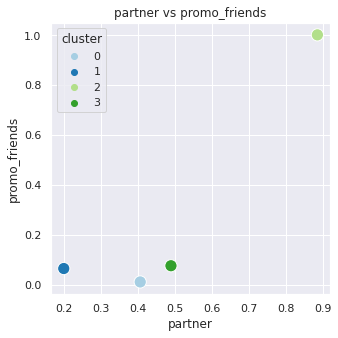

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


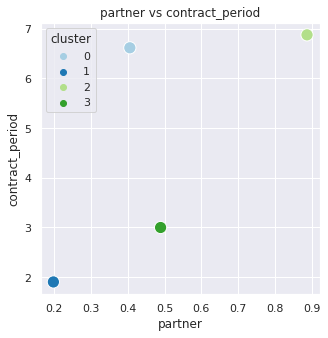

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


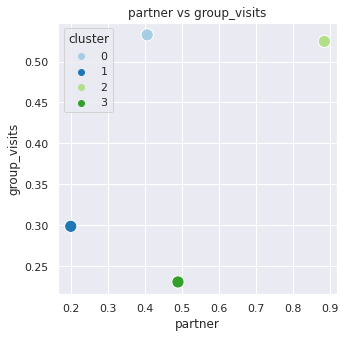

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


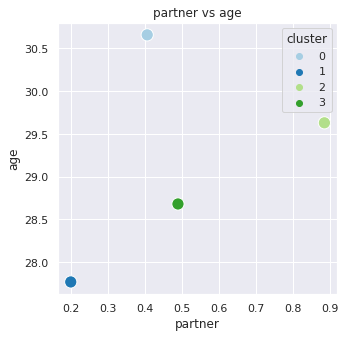

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


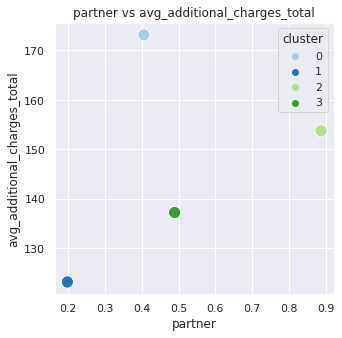

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


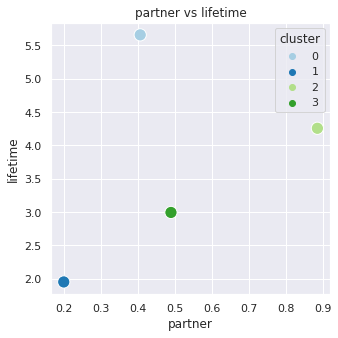

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


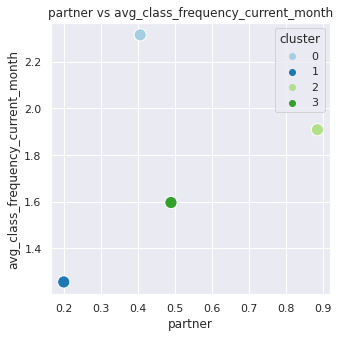

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


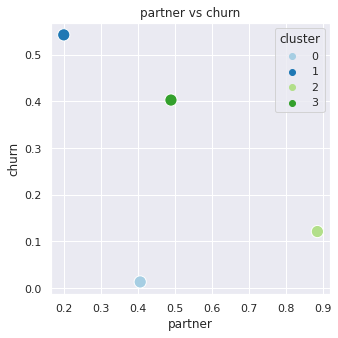

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


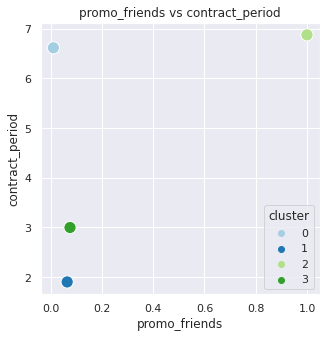

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


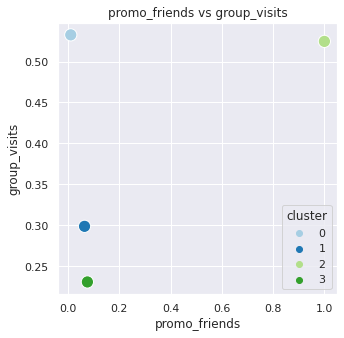

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


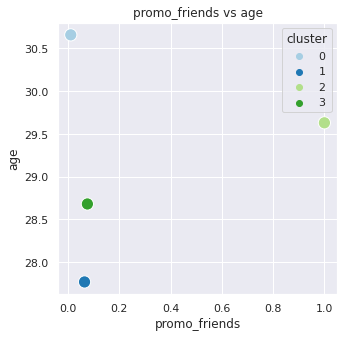

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


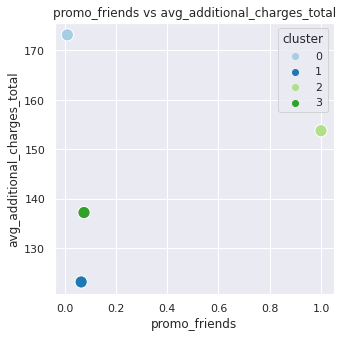

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


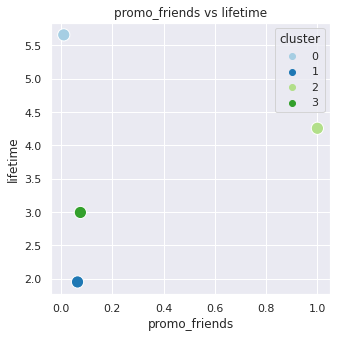

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


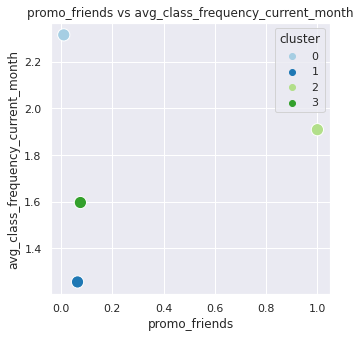

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


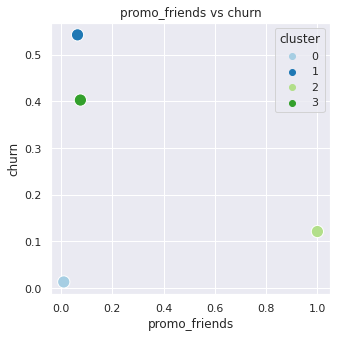

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


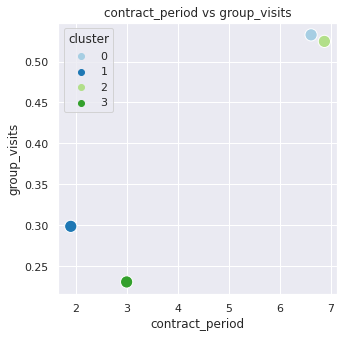

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


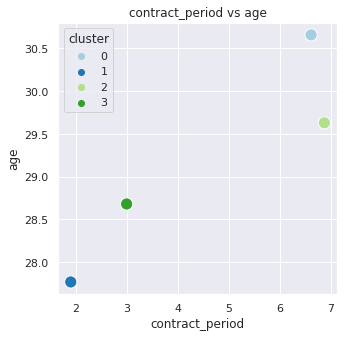

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


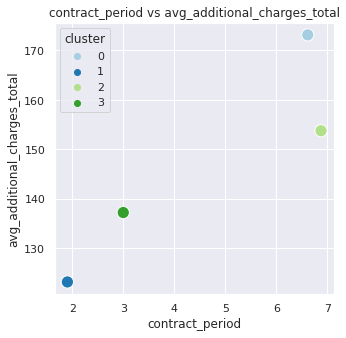

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


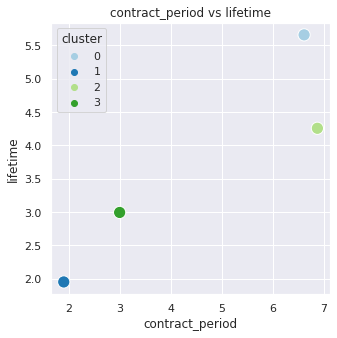

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


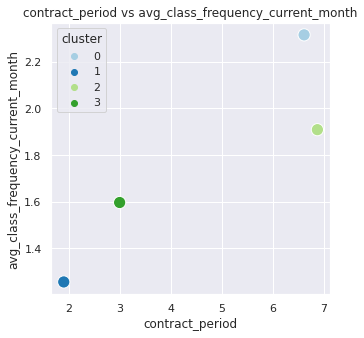

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


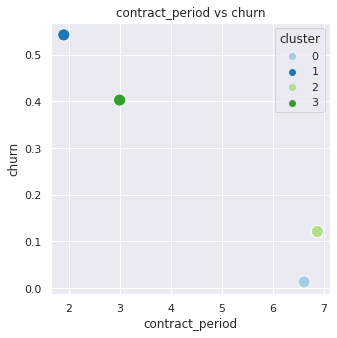

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


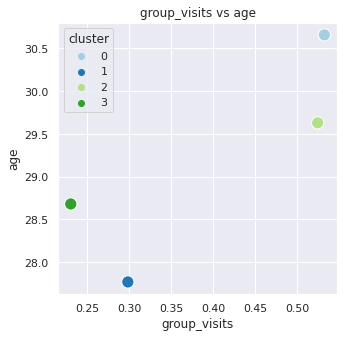

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


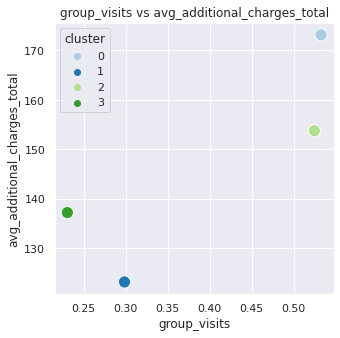

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


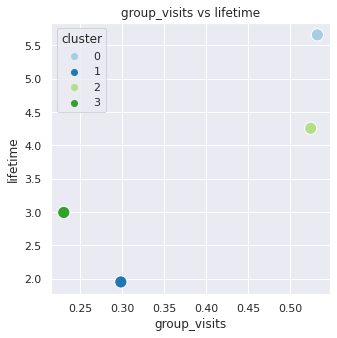

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


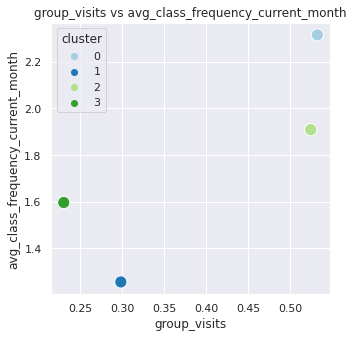

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


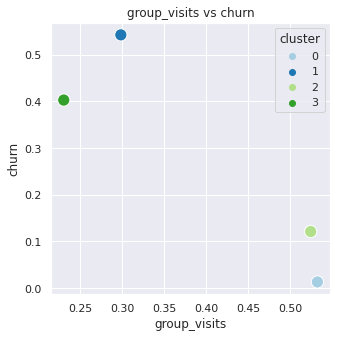

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


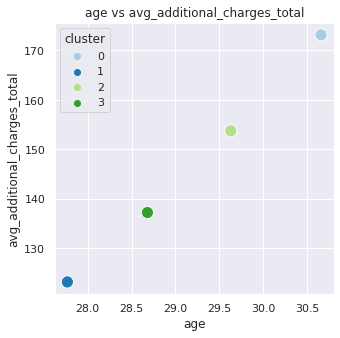

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


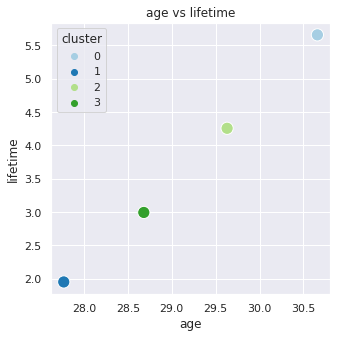

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


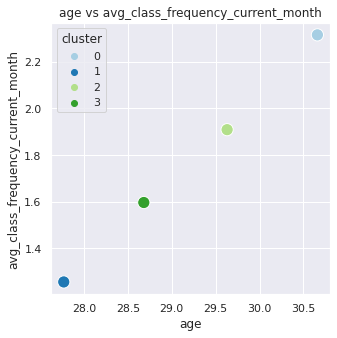

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


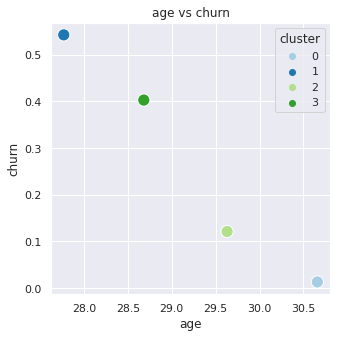

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


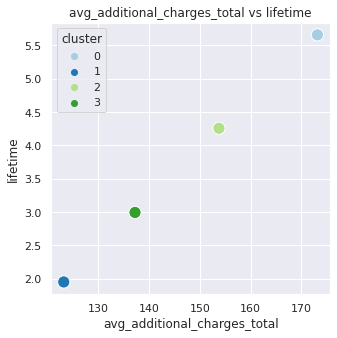

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


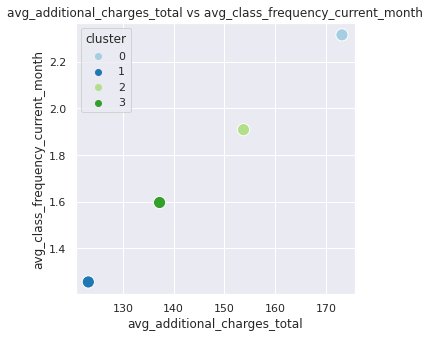

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


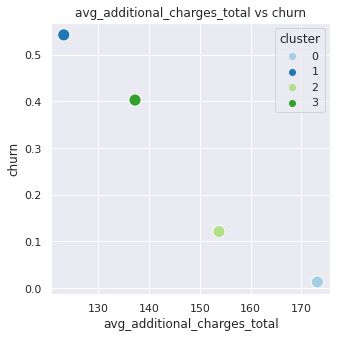

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


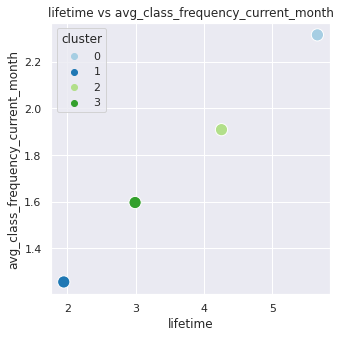

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


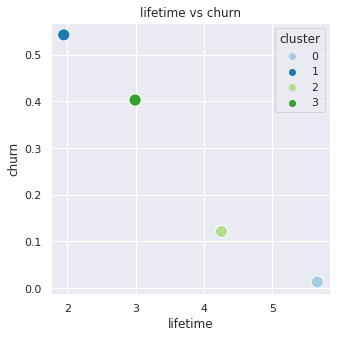

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


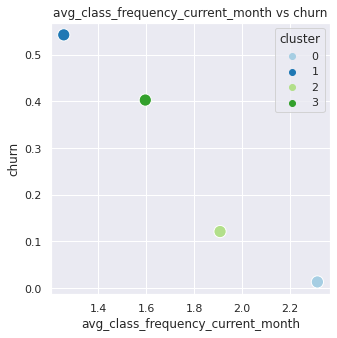

In [27]:
cluster_data = cluster_data.reset_index()

for pair in col_pairs:
    show_clusters_on_plot(cluster_data, pair[0], pair[1], 'cluster', 150)

Полученные графические данные подтверждают ранее обозначенные корреляции, а также иллюстрируют взаимосвязь пар признаков во всех выделенных кластерах.

Фактически эти данные являются иллюстрацией проведенной сегментации клиентов и визуализируют ее результаты.

**Склонность кластеров к оттоку**

По мере снижения риска оттока:
1. кластер 3 - 54%
2. кластер 1 - 40%
3. кластер 2 - 12%
4. кластер 0 - 1%.

## Выводы и базовые рекомендации

1. Только один кластер (кластер 0) не склонен к оттоку, но он не самый многочисленный (26,5%). В нем сосредоточены близкоживущие (близкоработающие) клиенты, 40% из которых – сотрудники партнерских предприятий с более чем полугодовой длительностью контракта. Во многом сходен с ним кластер 2 (27,5% всех клиентов). Он отличается только тем, что в нем все клиенты пришли по приглашению друзей с промо-кодом и в нем почти 90% - сотрудники предприятий-партнеров. Отток в кластере есть, но небольшой – 12%.
2. Наиболее проблемный кластер – 1 (склонность к оттоку 54%), но он и самый многочисленный (31%). Рядом с ним по совокупности параметров оказывается самый малочисленный кластер 3 (15%). Отток в нем составляет более 40%, а ключевым отличием от кластера 1 является удаленность места жительства или работы клиентов от фитнес-центров сети (кластер 1, как и кластеры 0 и 2 формируют только близкоживущие (близкоработающие) клиенты. 
3. В этой связи предстоит определить маркетинговую стратегию сети: либо А) сосредоточить усилия на удержании клиентов кластера 1 (и во вторую очередь кластера 3), либо, Б) если кластеры 1 и 3 по своим характеристикам не является приоритетным, то сосредоточить усилия на привлечении новых клиентов, относящихся к кластерам 0 и 2.
4. Стратегия А предполагает повышенные затраты на удержание клиентов кластеров 1 и 3 (бонусные программы, акции, мотивирующие на длительное взаимодействие, скидки за "стаж").
5. Стратегия Б предполагает повышенные затраты на имиджевую и продуктовую рекламу (которая сработает на кластер 1, но также и в том числе на целевое дружественное промо-привлечение, которое сработает в основном для кластера 2). Существенный результат может и должно дать расширение партнерской сети, которая является первоклассным генератором наиболее устойчивых клиентов, которые, помимо прочего, приносят и наибольший дополнительный доход (этот подход сработает преимущественно в кластере 2, но и даст результат в наиболее ценном кластере 1). 
6. Эффективность дружеского промо-привлечения в кластере 2 (100% кластера привлечены по промо-программе) дает неплохие результаты: приходят качественные долгосрочные клиенты с небольшим уровнем оттока (всего 12%). Очевидно, эту практику следует продолжить и расширить, так как уровень удержания для своего рода «пробных» клиентов на уровне 88% является очень хорошим.
7. В конечном итоге, дальнейшие маркетинговые действия и их итоги зависят от расчетов предполагаемых результатов, которые могут принести стратегии А и Б, т.е. от выбора стратегии, а также от оценки целесообразности расширения практики привлечения новых «промо-клиентов».
